Ml модель классификации для предсказания выбытия за 2 дня до выбытия

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('cleaned_dataset_classify.csv')
df.head()

,With_Separator,With_Slamretarder,With_Valve,sk_calendarprevmonth,GRPCount,OPZCount,CurrentTTF,FailuresCountFromLastWellWork,LayerCount,CasingDiameter_mm,...,ESP_Paker,LiquidRate_0_50,LiquidRate_50_125,LiquidRate_125_300,LiquidRate_300_500,LiquidRate_500_1000,LiquidRate_1000,daysToFailure,daysFromLastStart,Target
0,1,1,1,20200321,0,0,722.0,2,1.0,126.0,...,0,1,0,0,0,0,0,3,719,0.0
1,1,1,1,20200322,0,0,722.0,2,1.0,126.0,...,0,1,0,0,0,0,0,2,720,0.0
2,1,1,1,20200323,0,0,722.0,2,1.0,126.0,...,0,1,0,0,0,0,0,1,721,1.0
3,1,1,1,20201106,3,0,443.0,1,1.0,132.0,...,0,1,0,0,0,0,0,3,440,0.0
4,1,1,1,20201107,3,0,443.0,1,1.0,132.0,...,0,1,0,0,0,0,0,2,441,0.0


In [3]:
X=df[['GRPCount','OPZCount','FailuresCountFromLastWellWork','BottomDrilled_m','PipeLength_m','ReservoirTemperature_c','LiquidRate_m3_d']]
X

,GRPCount,OPZCount,FailuresCountFromLastWellWork,BottomDrilled_m,PipeLength_m,ReservoirTemperature_c,LiquidRate_m3_d
0,0,0,2,2178.0,0.0,60.0,37.0
1,0,0,2,2178.0,0.0,60.0,37.0
2,0,0,2,2178.0,0.0,60.0,37.0
3,3,0,1,2353.0,0.0,60.0,26.0
4,3,0,1,2353.0,0.0,60.0,26.0
...,...,...,...,...,...,...,...
2140,0,1,0,1810.0,0.0,60.0,226.0
2141,0,1,0,1810.0,0.0,60.0,226.0
2142,6,0,2,3226.0,0.0,60.0,11.0
2143,6,0,2,3226.0,0.0,60.0,11.0


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   GRPCount                       2145 non-null   int64  
 1   OPZCount                       2145 non-null   int64  
 2   FailuresCountFromLastWellWork  2145 non-null   int64  
 3   BottomDrilled_m                2145 non-null   float64
 4   PipeLength_m                   2145 non-null   float64
 5   ReservoirTemperature_c         2145 non-null   float64
 6   LiquidRate_m3_d                2145 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 117.4 KB


In [5]:
Y=df[['Target']]

In [6]:
Y.head()

,Target
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0


In [7]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Target  2145 non-null   float64
dtypes: float64(1)
memory usage: 16.9 KB


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import  roc_auc_score, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [45]:
class Stacking_Classify:
    def __init__(self):
        self.estimators = [
            ('decision_tree', DecisionTreeClassifier(random_state=42)),
            ('knn', KNeighborsClassifier()),
            ('rf', RandomForestClassifier(random_state=42))
        ]
        self.final_estimator = LogisticRegression()
        self.sc = StackingClassifier(estimators=self.estimators, final_estimator=self.final_estimator)
    def train_model_sc(self, X_train, Y_train):
        return self.sc.fit(X_train, Y_train)    
    def predict_sc(self, X):
        return self.sc.predict(X)
    def predict_proba_sc(self, X):
        return self.sc.predict_proba(X)
    def metrics_sc(self, X, Y):
        sc_pred= self.sc.predict(X)
        print(f'r2: {accuracy_score(Y, sc_pred)}\nroc_auc_score: {roc_auc_score(Y, sc_pred)}\n f1_score: {f1_score(Y,sc_pred)} ')
    def plot_class_distribution(self, X, Y):
        plt.figure(figsize=(8, 6))

        # Extracting the probability of class 1
        prob_class_1 = self.sc.predict_proba(X)[:, 1]

        # Plotting the distribution of class 0 and 1
        plt.hist(prob_class_1[Y==0], bins=50, alpha=0.5, color='red', label='Class 0')
        plt.hist(prob_class_1[Y==1], bins=50, alpha=0.5, color='blue', label='Class 1')

        plt.xlabel('Probability of Class 1')
        plt.ylabel('Count')
        plt.title('Distribution of Class 0 and 1')

        plt.legend()
        plt.show()    

In [11]:
sc= Stacking_Classify()
sc.train_model_sc(X_train, Y_train)

d:\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


StackingClassifier(estimators=[('decision_tree',
                                DecisionTreeClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('rf', RandomForestClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [12]:
sc.metrics_sc(X_train, Y_train)

r2: 0.5192307692307693
roc_auc_score: 0.38538062283737023
 f1_score: 0.0 


In [13]:
sc.metrics_sc(X_test, Y_test)

r2: 0.8648018648018648
roc_auc_score: 0.8787497056745939
 f1_score: 0.8323699421965318 


In [14]:
predictions = sc.predict_proba_sc(X_test)

матрица ошибок

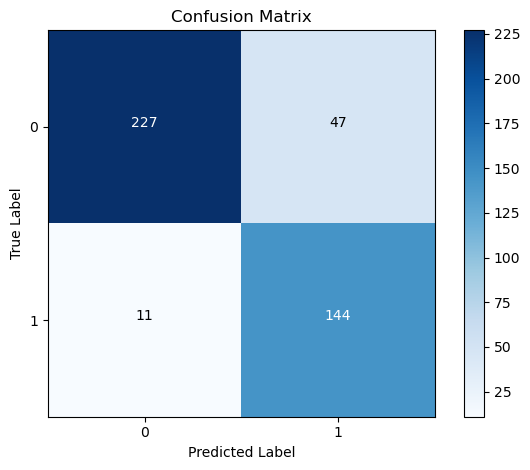

In [15]:
from sklearn.metrics import confusion_matrix
import itertools
# Вычисление матрицы ошибок
cm = confusion_matrix(Y_test, sc.predict_sc(X_test))

# Построение матрицы ошибок
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Добавление значений в ячейки матрицы ошибок
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.savefig('confusion Matrix.png', dpi=1000)
plt.show()

Построим график roc_curve и график precision-recall

In [16]:
from sklearn.metrics import roc_curve

In [17]:
fpr, tpr, thres = roc_curve(Y_test, predictions[:,1])

In [18]:
for line in zip(fpr[:10], tpr[:10], thres[:10]):
    print(line)

(0.0, 0.0, inf)
(0.0, 0.0064516129032258064, 0.7847802773854914)
(0.0, 0.10967741935483871, 0.7460073451029938)
(0.0, 0.12258064516129032, 0.7439490480264792)
(0.0, 0.17419354838709677, 0.7357830116161519)
(0.0, 0.1870967741935484, 0.7334194387186653)
(0.0, 0.24516129032258063, 0.7276769990511484)
(0.0, 0.25806451612903225, 0.7274519525634636)
(0.0, 0.32903225806451614, 0.7176814380598888)
(0.0, 0.3419354838709677, 0.7174864455181963)


In [19]:
import matplotlib.pyplot as plt
import numpy as np

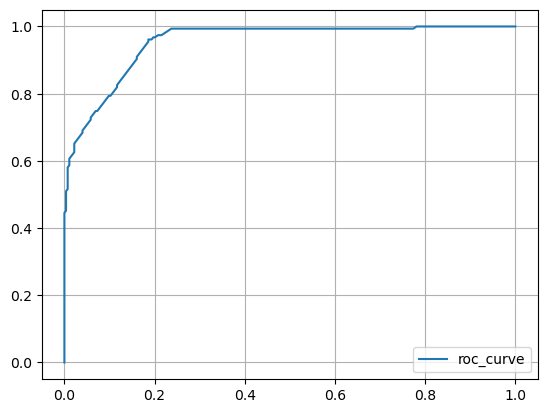

In [20]:
plt.plot(fpr, tpr, label='roc_curve')
plt.legend()
plt.grid()

In [21]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [22]:
pr, re, thres = precision_recall_curve(Y_test, predictions[:,1])

In [23]:
for line in zip(pr[:10], re[:10], thres[:10]):
    print(line)

(0.3613053613053613, 1.0, 0.0024816012927855583)
(0.3629976580796253, 1.0, 0.00311486845782233)
(0.36470588235294116, 1.0, 0.0035088651302705143)
(0.3664302600472813, 1.0, 0.003625823257788545)
(0.3681710213776722, 1.0, 0.0038485071932555987)
(0.36992840095465396, 1.0, 0.0038811784783456976)
(0.37170263788968827, 1.0, 0.003914126031268081)
(0.37349397590361444, 1.0, 0.003958983115833916)
(0.37530266343825663, 1.0, 0.004257602180734032)
(0.3771289537712895, 1.0, 0.005012906538806897)


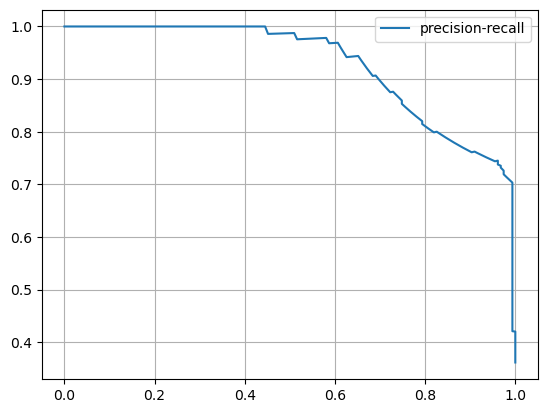

In [24]:
plt.plot(re, pr, label='precision-recall')
plt.legend()
plt.grid()


В ходе построения нескольких моделей на основе стэккинга и град. бустинга(xgboost, catboost), стало ясно что стэккинг лучше всех справляется с этой задачей

Теперь построим на основе наших данных модель для регрессии

In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error

In [26]:
df=pd.read_csv('cleaned_dataset_regr.csv')
df.head()

,With_Separator,With_Slamretarder,With_Valve,NKT1_ConventionalDiameter,NKT1_TubingCount,NKT1_TubingLevelLength,NKT1_CPOCount,NKT1_BoreNumber,sk_calendarprevmonth,GRPCount,...,LiquidRate_125_300,LiquidRate_300_500,LiquidRate_500_1000,LiquidRate_1000,LP1_SK_Layer,Deflection,CurvRP,MaxCurvRP,daysToFailure,daysFromLastStart
0,1,0,0,73.0,0.0,61.5,0.0,10.0,20131021,0,...,0,0,0,0,90105.0,0.0,0.0,2.150051,773,780
1,1,0,0,73.0,0.0,61.5,0.0,10.0,20131022,0,...,0,0,0,0,90105.0,0.0,0.0,2.150051,772,781
2,1,0,0,73.0,0.0,61.5,0.0,10.0,20131023,0,...,0,0,0,0,90105.0,0.0,0.0,2.150051,771,782
3,1,0,0,73.0,0.0,61.5,0.0,10.0,20131024,0,...,0,0,0,0,90105.0,0.0,0.0,2.150051,770,783
4,1,0,0,73.0,0.0,61.5,0.0,10.0,20131025,0,...,0,0,0,0,90105.0,0.0,0.0,2.150051,769,784


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62918 entries, 0 to 62917
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   With_Separator                 62918 non-null  int64  
 1   With_Slamretarder              62918 non-null  int64  
 2   With_Valve                     62918 non-null  int64  
 3   NKT1_ConventionalDiameter      62918 non-null  float64
 4   NKT1_TubingCount               62918 non-null  float64
 5   NKT1_TubingLevelLength         62918 non-null  float64
 6   NKT1_CPOCount                  62918 non-null  float64
 7   NKT1_BoreNumber                62918 non-null  float64
 8   sk_calendarprevmonth           62918 non-null  int64  
 9   GRPCount                       62918 non-null  int64  
 10  OPZCount                       62918 non-null  int64  
 11  CurrentTTF                     62918 non-null  float64
 12  FailuresCountFromLastWellWork  62918 non-null 

In [28]:
X=df[['GRPCount','OPZCount','FailuresCountFromLastWellWork','BottomDrilled_m','PipeLength_m','ReservoirTemperature_c','LiquidRate_m3_d']]
X

,GRPCount,OPZCount,FailuresCountFromLastWellWork,BottomDrilled_m,PipeLength_m,ReservoirTemperature_c,LiquidRate_m3_d
0,0,0,0,2178.0,0.0,60.0,43.0
1,0,0,0,2178.0,0.0,60.0,43.0
2,0,0,0,2178.0,0.0,60.0,43.0
3,0,0,0,2178.0,0.0,60.0,43.0
4,0,0,0,2178.0,0.0,60.0,43.0
...,...,...,...,...,...,...,...
62913,0,0,0,2157.0,0.0,53.0,350.0
62914,0,0,0,2157.0,0.0,53.0,350.0
62915,0,0,0,2157.0,0.0,53.0,350.0
62916,0,0,0,2157.0,0.0,53.0,350.0


In [29]:
Y=df[['daysToFailure']]
Y.head()

,daysToFailure
0,773
1,772
2,771
3,770
4,769


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [31]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [32]:
from catboost import CatBoostRegressor 

In [33]:
class Cat_regr:
    def __init__(self):
        self.cat = CatBoostRegressor(random_state=0)
    def train_model_cat(self, X_train, y_train):
        return self.cat.fit(X_train, y_train)    
    def predict_cat(self, X):
        return self.cat.predict(X)
    def predict_proba_cat(self, X):
        return self.cat.predict_proba(X)
    def metrics_cat(self, X, Y):
        cat_pred= self.cat.predict(X)
        print(f'r2: {r2_score(Y, cat_pred)}\ncross_val_score: {cross_val_score(self.cat, X, Y).mean()} ')

In [34]:
cat = Cat_regr()

In [35]:
cat.train_model_cat(X_train, Y_train)

Learning rate set to 0.076046
0:	learn: 309.3848054	total: 147ms	remaining: 2m 26s
1:	learn: 302.9513070	total: 153ms	remaining: 1m 16s
2:	learn: 297.1745508	total: 158ms	remaining: 52.5s
3:	learn: 292.1110816	total: 163ms	remaining: 40.7s
4:	learn: 287.3388275	total: 170ms	remaining: 33.8s
5:	learn: 282.1843529	total: 174ms	remaining: 28.9s
6:	learn: 278.4252099	total: 180ms	remaining: 25.5s
7:	learn: 275.0086998	total: 186ms	remaining: 23.1s
8:	learn: 270.7314523	total: 191ms	remaining: 21s
9:	learn: 267.9059848	total: 200ms	remaining: 19.8s
10:	learn: 265.3242919	total: 207ms	remaining: 18.6s
11:	learn: 262.9751567	total: 215ms	remaining: 17.7s
12:	learn: 260.2408217	total: 220ms	remaining: 16.7s
13:	learn: 258.1058444	total: 226ms	remaining: 15.9s
14:	learn: 256.2102412	total: 233ms	remaining: 15.3s
15:	learn: 253.6017317	total: 239ms	remaining: 14.7s
16:	learn: 251.0183021	total: 246ms	remaining: 14.2s
17:	learn: 249.0075571	total: 253ms	remaining: 13.8s
18:	learn: 247.3906082	tot

In [36]:
cat.metrics_cat(X_train, Y_train)

Learning rate set to 0.073411
0:	learn: 310.3272771	total: 4.87ms	remaining: 4.86s
1:	learn: 304.2475619	total: 10.9ms	remaining: 5.42s
2:	learn: 298.9149121	total: 15.6ms	remaining: 5.18s
3:	learn: 293.8284702	total: 20.6ms	remaining: 5.13s
4:	learn: 288.9755659	total: 26.7ms	remaining: 5.31s
5:	learn: 284.4433955	total: 31.2ms	remaining: 5.17s
6:	learn: 280.6887719	total: 36.1ms	remaining: 5.13s
7:	learn: 277.3052161	total: 41.7ms	remaining: 5.18s
8:	learn: 274.4605013	total: 46.4ms	remaining: 5.1s
9:	learn: 271.6900321	total: 51.3ms	remaining: 5.08s
10:	learn: 268.7929939	total: 57.2ms	remaining: 5.14s
11:	learn: 265.7930133	total: 61.7ms	remaining: 5.08s
12:	learn: 263.5057279	total: 66.3ms	remaining: 5.04s
13:	learn: 261.3737926	total: 71.8ms	remaining: 5.06s
14:	learn: 259.5516162	total: 76.8ms	remaining: 5.04s
15:	learn: 256.8029645	total: 81.3ms	remaining: 5s
16:	learn: 254.3751999	total: 85.9ms	remaining: 4.96s
17:	learn: 252.0564511	total: 92.3ms	remaining: 5.03s
18:	learn: 2

In [37]:
cat.metrics_cat(X_test, Y_test)

Learning rate set to 0.058971
0:	learn: 308.5520767	total: 5.08ms	remaining: 5.08s
1:	learn: 303.7633102	total: 9.05ms	remaining: 4.52s
2:	learn: 299.8513196	total: 12.1ms	remaining: 4.02s
3:	learn: 295.9347953	total: 15.7ms	remaining: 3.9s
4:	learn: 291.8615284	total: 18.5ms	remaining: 3.69s
5:	learn: 288.2219424	total: 21.1ms	remaining: 3.49s
6:	learn: 285.0400451	total: 24.3ms	remaining: 3.44s
7:	learn: 282.1054597	total: 27.3ms	remaining: 3.38s
8:	learn: 279.6419793	total: 29.8ms	remaining: 3.28s
9:	learn: 276.5037430	total: 32.3ms	remaining: 3.19s
10:	learn: 274.1867723	total: 34.8ms	remaining: 3.13s
11:	learn: 272.3165933	total: 37.4ms	remaining: 3.08s
12:	learn: 270.2753661	total: 40.4ms	remaining: 3.07s
13:	learn: 268.0197700	total: 43ms	remaining: 3.03s
14:	learn: 266.4018377	total: 45.6ms	remaining: 2.99s
15:	learn: 264.1218227	total: 48.1ms	remaining: 2.96s
16:	learn: 262.0553489	total: 50.6ms	remaining: 2.92s
17:	learn: 260.1859781	total: 53.1ms	remaining: 2.89s
18:	learn: 

Добавим модель xgboost

In [38]:
from xgboost import XGBRegressor

In [39]:
class XGB_regr:
    def __init__(self):
        self.xgb = XGBRegressor(random_state=0)
    def train_model_xgb(self, X_train, y_train):
        return self.xgb.fit(X_train, y_train)    
    def predict_xgb(self, X):
        return self.xgb.predict(X)
    def predict_proba_xgb(self, X):
        return self.xgb.predict_proba(X)
    def metrics_xgb(self, X, Y):
        xgb_pred= self.xgb.predict(X)
        print(f'r2: {r2_score(Y, xgb_pred)}\ncross_val_score: {cross_val_score(self.xgb, X, Y).mean()} ')

In [40]:
xgb = XGB_regr()
xgb.train_model_xgb(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [41]:
xgb.metrics_xgb(X_train, Y_train)

r2: 0.8679350563214262
cross_val_score: 0.8663108559245035 


In [42]:
xgb.metrics_xgb(X_test, Y_test)

r2: 0.851482359511134
cross_val_score: 0.8380415386503269 


Визуализируем обе модели

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

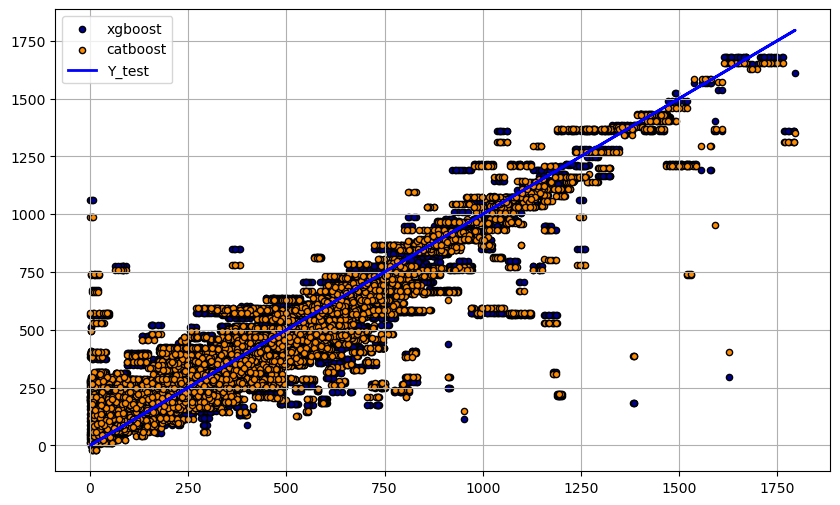

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(Y_test, xgb.predict_xgb(X_test),s=20, edgecolor="black", c="darkblue",label='xgboost')
plt.scatter(Y_test, cat.predict_cat(X_test),s=20,  edgecolor="black", c="darkorange", label="catboost")
plt.plot(Y_test, Y_test,label='Y_test', c='blue', linewidth=2)
plt.legend()
plt.grid()
plt.plot

In [44]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd




def cat_data():
    # Открытие диалогового окна для выбора файла CSV
    file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
    if file_path:
        # Загрузка данных из выбранного файла
        data = pd.read_csv(file_path,delimiter=';')
        
        # Получение признаков для предсказания
        features = data[['GRPCount','OPZCount','FailuresCountFromLastWellWork','BottomDrilled_m','PipeLength_m','ReservoirTemperature_c','LiquidRate_m3_d']]  # Замените "Feature1" и "Feature2" на ваши реальные признаки
        
        # Предсказание с помощью модели CatBoostRegressor
        y_pred = cat.predict_cat(features)
        
        # Создание нового DataFrame с исходными данными и предсказанными значениями
        result = pd.concat([data, pd.DataFrame(y_pred, columns=["Time to failure"])], axis=1)
        
        # Сохранение нового DataFrame в новый файл CSV
        result.to_csv("cat_result.csv", index=False)  # Замените "result.csv" на название вашего нового файла
        
        print("Результаты предсказания сохранены в файл cat_result.csv")


def xgb_data():
    # Открытие диалогового окна для выбора файла CSV
    file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
    if file_path:
        # Загрузка данных из выбранного файла
        data = pd.read_csv(file_path,delimiter=';')
        
        # Получение признаков для предсказания
        features = data[['GRPCount','OPZCount','FailuresCountFromLastWellWork','BottomDrilled_m','PipeLength_m','ReservoirTemperature_c','LiquidRate_m3_d']]  # Замените "Feature1" и "Feature2" на ваши реальные признаки
        
        # Предсказание с помощью модели CatBoostRegressor
        y_pred = xgb.predict_xgb(features)
        
        # Создание нового DataFrame с исходными данными и предсказанными значениями
        result = pd.concat([data, pd.DataFrame(y_pred, columns=["Time to failure"])], axis=1)
        
        # Сохранение нового DataFrame в новый файл CSV
        result.to_csv("xgb_result.csv", index=False)  
        
        print("Результаты предсказания сохранены в файл xgb_result.csv")        


def sc_data():
    # Открытие диалогового окна для выбора файла CSV
    file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
    if file_path:
        # Загрузка данных из выбранного файла
        data = pd.read_csv(file_path, delimiter=';')
        
        # Получение признаков для предсказания
        features = data[['GRPCount','OPZCount','FailuresCountFromLastWellWork','BottomDrilled_m','PipeLength_m','ReservoirTemperature_c','LiquidRate_m3_d']]  # Замените "Feature1" и "Feature2" на ваши реальные признаки
        
        # Предсказание с помощью модели CatBoostRegressor
        y_pred = sc.predict_sc(features)
        
        # Создание нового DataFrame с исходными данными и предсказанными значениями
        result = pd.concat([data, pd.DataFrame(y_pred, columns=["Failure"])], axis=1)
        
        # Сохранение нового DataFrame в новый файл CSV
        result.to_csv("sc_result.csv", index=False) 
        
        print("Результаты предсказания сохранены в файл sc_result.csv")         
        

# Создание графического интерфейса с кнопкой 
root = tk.Tk()
root.title("Модели машинного обучения для расчета выбытия УЭЦН")
root.geometry("500x300")

def create_window1():
    cat_data()

def create_window2():    
    xgb_data()

def create_window3():    
    sc_data()

label1 = tk.Label(root, text="Модель: Catboost_regressor", font=('Cambria', 12))
label1.pack(side='top')
button1 = tk.Button(root,bg="darkorange",text="Catboost_regressor, целевое значение- Time to failure (дней) ",font=('Cambria', 10), command=create_window1)
button1.pack(side='top')
label2 = tk.Label(root, text="Модель: XGboost_regressor", font=('Cambria', 12))
label2.pack(side='top')
button2 = tk.Button(root, bg="blue",text="XGboost_regressor, целевое значение- Time to failure (дней)",font=('Cambria', 10), command=create_window2)
button2.pack(side='top')
label3 = tk.Label(root, text="Модель: Stacking_classifier", font=('Cambria', 12))
label3.pack(side='top')
button3 = tk.Button(root,bg='darkgreen',text="Stacking_classifier, целевое значение- Failure (Да/Нет) ",font=('Cambria', 10), command=create_window3)
button3.pack(side='top')


root.mainloop()